In [55]:
import xlrd
import pandas as pd

import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

#we should implement standard scalar but its already good accuracy,
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Preproccessing notebook

In [91]:
bat_df = pd.read_excel("Bat_Historical_price.xlsx") #, index_col=0) if you want 
bat_df.head()

,Date,Open*,High,Low,Close**,Volume,Market Cap
0,2018-03-21,0.212079,0.225229,0.206217,0.208152,5095830,208152000
1,2018-03-20,0.206148,0.221051,0.196140,0.211607,4744160,211607000
2,2018-03-19,0.189039,0.206083,0.184619,0.204119,4389990,204119000
3,2018-03-18,0.189700,0.189917,0.156901,0.189207,5125320,189207000
4,2018-03-17,0.198651,0.201822,0.186630,0.190163,4629150,190163000


In [92]:
bat_df['Date'] = pd.to_datetime(bat_df.Date)
bat_df = bat_df.sort_values(by = ['Date'])
bat_df.head()

,Date,Open*,High,Low,Close**,Volume,Market Cap
125,2017-11-16,0.144264,0.172310,0.139390,0.167167,6494270,167167000
124,2017-11-17,0.166421,0.180135,0.155159,0.160654,5317800,160654000
123,2017-11-18,0.161460,0.165633,0.155645,0.162501,3096680,162501000
122,2017-11-19,0.163459,0.164833,0.158315,0.161358,2455030,161358000
121,2017-11-20,0.159930,0.163229,0.156410,0.157709,2961210,157709000


In [93]:
# now need to reindex 
bat_df = bat_df.reset_index(drop=True)
bat_df.head()

,Date,Open*,High,Low,Close**,Volume,Market Cap
0,2017-11-16,0.144264,0.172310,0.139390,0.167167,6494270,167167000
1,2017-11-17,0.166421,0.180135,0.155159,0.160654,5317800,160654000
2,2017-11-18,0.161460,0.165633,0.155645,0.162501,3096680,162501000
3,2017-11-19,0.163459,0.164833,0.158315,0.161358,2455030,161358000
4,2017-11-20,0.159930,0.163229,0.156410,0.157709,2961210,157709000


In [94]:
mega_df = pd.read_csv('df_ultra_mega_frame2.csv')
mega_df.head()

,date,SearchFrequency,DJI,price_btc,price_eth,sentiment,pos_count,neg_count
0,2017-11-16,55,23458.359375,7871.69,330.92,0.089579,14,15
1,2017-11-17,75,23358.240234,7708.99,332.39,0.087821,8,31
2,2017-11-18,103,23358.240234,7790.15,347.61,0.092867,5,8
3,2017-11-19,65,23358.240234,8036.49,354.39,0.092423,3,12
4,2017-11-20,96,23430.330078,8200.64,366.73,0.093611,7,10


In [95]:
# now I want to do pd.merge basically but first I should set the 
# index of both to be the date column
bat_df = bat_df.set_index('Date')
mega_df = mega_df.set_index('date')
mega_df.index.names = ['Date']

In [96]:
mega_df.head()

,SearchFrequency,DJI,price_btc,price_eth,sentiment,pos_count,neg_count
Date,,,,,,,
2017-11-16,55,23458.359375,7871.69,330.92,0.089579,14,15
2017-11-17,75,23358.240234,7708.99,332.39,0.087821,8,31
2017-11-18,103,23358.240234,7790.15,347.61,0.092867,5,8
2017-11-19,65,23358.240234,8036.49,354.39,0.092423,3,12
2017-11-20,96,23430.330078,8200.64,366.73,0.093611,7,10


In [97]:
bat_df.head()

,Open*,High,Low,Close**,Volume,Market Cap
Date,,,,,,
2017-11-16,0.144264,0.172310,0.139390,0.167167,6494270,167167000
2017-11-17,0.166421,0.180135,0.155159,0.160654,5317800,160654000
2017-11-18,0.161460,0.165633,0.155645,0.162501,3096680,162501000
2017-11-19,0.163459,0.164833,0.158315,0.161358,2455030,161358000
2017-11-20,0.159930,0.163229,0.156410,0.157709,2961210,157709000


In [98]:
# I should drop all columns other than Close for , merge, then output to a csv 
# now I can merge... and then should output to a csv 
bat_df = bat_df['Close**']

In [99]:
bat_df = bat_df.rename(columns = {'Close**': 'Close'})

In [100]:
bat_df.head()

Date
2017-11-16    0.167167
2017-11-17    0.160654
2017-11-18    0.162501
2017-11-19    0.161358
2017-11-20    0.157709
dtype: float64

In [101]:
# now pd.merge
features_df = pd.concat([mega_df, bat_df], axis=1)

In [102]:
features_df.head()

,SearchFrequency,DJI,price_btc,price_eth,sentiment,pos_count,neg_count,0
Date,,,,,,,,
2017-11-16,55,23458.359375,7871.69,330.92,0.089579,14,15,0.167167
2017-11-17,75,23358.240234,7708.99,332.39,0.087821,8,31,0.160654
2017-11-18,103,23358.240234,7790.15,347.61,0.092867,5,8,0.162501
2017-11-19,65,23358.240234,8036.49,354.39,0.092423,3,12,0.161358
2017-11-20,96,23430.330078,8200.64,366.73,0.093611,7,10,0.157709


In [103]:
#prices in USD 
features_df = features_df.rename(columns = {0: 'price_bat'})
features_df.head()

,SearchFrequency,DJI,price_btc,price_eth,sentiment,pos_count,neg_count,price_bat
Date,,,,,,,,
2017-11-16,55,23458.359375,7871.69,330.92,0.089579,14,15,0.167167
2017-11-17,75,23358.240234,7708.99,332.39,0.087821,8,31,0.160654
2017-11-18,103,23358.240234,7790.15,347.61,0.092867,5,8,0.162501
2017-11-19,65,23358.240234,8036.49,354.39,0.092423,3,12,0.161358
2017-11-20,96,23430.330078,8200.64,366.73,0.093611,7,10,0.157709


In [104]:
features_df.to_csv('bat_features_df.csv')

In [105]:
#lets normalize all our data to properly see:

a = features_df['price_btc'] - features_df['price_btc'].min()
b = features_df['price_eth'] - features_df['price_eth'].min()
c = features_df['sentiment'] - features_df['sentiment'].min()
d = features_df['DJI'] - features_df['DJI'].min()

e = features_df['pos_count'] - features_df['pos_count'].min()
f = features_df['neg_count'] - features_df['neg_count'].min()
g = features_df['price_bat'] - features_df['price_bat'].min()

#df_ultra_mega_frame
norm_btc = a/a.max()
norm_eth = b/b.max()
norm_sent = c/c.max()
norm_dji = d/d.max()

norm_pos = e/e.max()
norm_neg = f/f.max()
norm_bat = g/g.max()

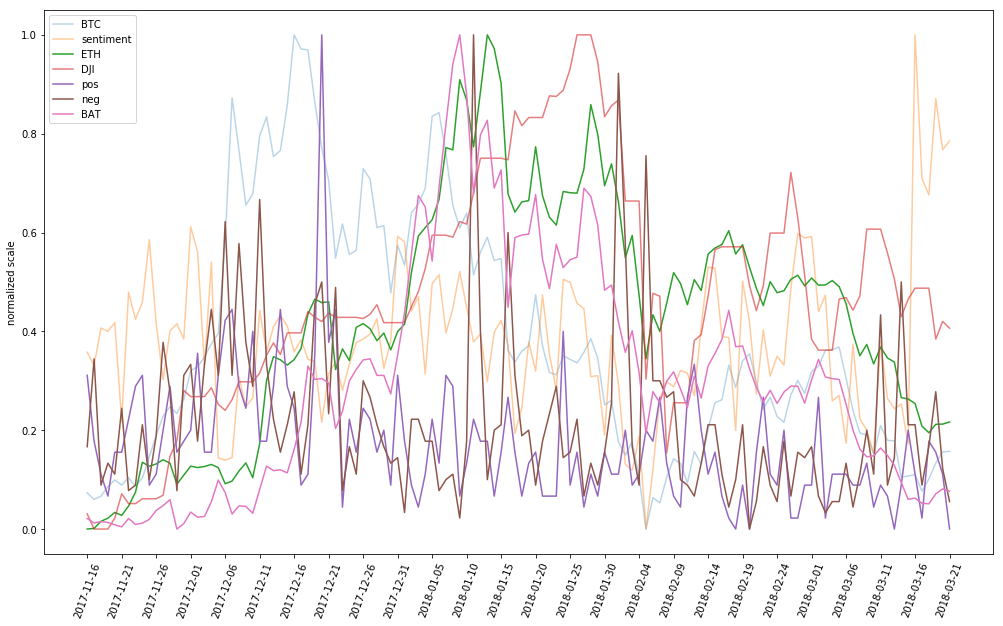

In [106]:
plt.figure(figsize=(17, 10))
line_btc = plt.plot(norm_btc, label='BTC', alpha = 0.3)
line_sent = plt.plot(norm_sent, label='sentiment', alpha = 0.4)
line_eth = plt.plot(norm_eth, label='ETH', alpha = 1)
line_dji = plt.plot(norm_dji, label='DJI', alpha = 0.6)
line_pos = plt.plot(norm_pos, label='pos', alpha = 1)
line_neg = plt.plot(norm_neg, label='neg', alpha = 1)
line_bat = plt.plot(norm_bat, label='BAT', alpha = 1)

plt.legend() #bbox_to_anchor=(1, 1),
 #         bbox_transform=plt.gcf().transFigure)

plt.ylabel('normalized scale')
plt.xticks(rotation=70)
plt.xticks(np.arange(0, len(features_df), 5.0))
plt.show()

#### A description of the variables:
DJI: Dow Jones Index, price_btc: Closing price of bitcoin on that day. price_eth: Closing price of ethereum on that day. sentiment: overall average sentiment score on all comments made on that day. pos_count: all positive comments made on that day. neg_count: representation of all negative comments made on that day. price_bat : price of the BAT alt ethereum coin.

transformations made on the data: for variable "neg_count", I wanted to ensure that it properly had positive correlation when small numbers of negative comments were said on the forums, and negative correlation when large numbers of negative comments were made on the forum. what I did was I multiplied all the daily counts for negative comments by (-1)and then added the minimum to every data point so that now, all datapoints for this variable were non-zero, and the day that had the largest number of negative comments would have a value of exactly zero.

In [107]:
features_df.head()

,SearchFrequency,DJI,price_btc,price_eth,sentiment,pos_count,neg_count,price_bat
Date,,,,,,,,
2017-11-16,55,23458.359375,7871.69,330.92,0.089579,14,15,0.167167
2017-11-17,75,23358.240234,7708.99,332.39,0.087821,8,31,0.160654
2017-11-18,103,23358.240234,7790.15,347.61,0.092867,5,8,0.162501
2017-11-19,65,23358.240234,8036.49,354.39,0.092423,3,12,0.161358
2017-11-20,96,23430.330078,8200.64,366.73,0.093611,7,10,0.157709


In [108]:
features_df['neg_count'] = features_df['neg_count']*(-1)

In [114]:
features_df['neg_count'] = features_df['neg_count']-features_df['neg_count'].min()

In [115]:
features_df.head()

,SearchFrequency,DJI,price_btc,price_eth,sentiment,pos_count,neg_count,price_bat
Date,,,,,,,,
2017-11-16,55,23458.359375,7871.69,330.92,0.089579,14,75,0.167167
2017-11-17,75,23358.240234,7708.99,332.39,0.087821,8,59,0.160654
2017-11-18,103,23358.240234,7790.15,347.61,0.092867,5,82,0.162501
2017-11-19,65,23358.240234,8036.49,354.39,0.092423,3,78,0.161358
2017-11-20,96,23430.330078,8200.64,366.73,0.093611,7,80,0.157709


In [117]:
features_df['neg_count'].max()

90

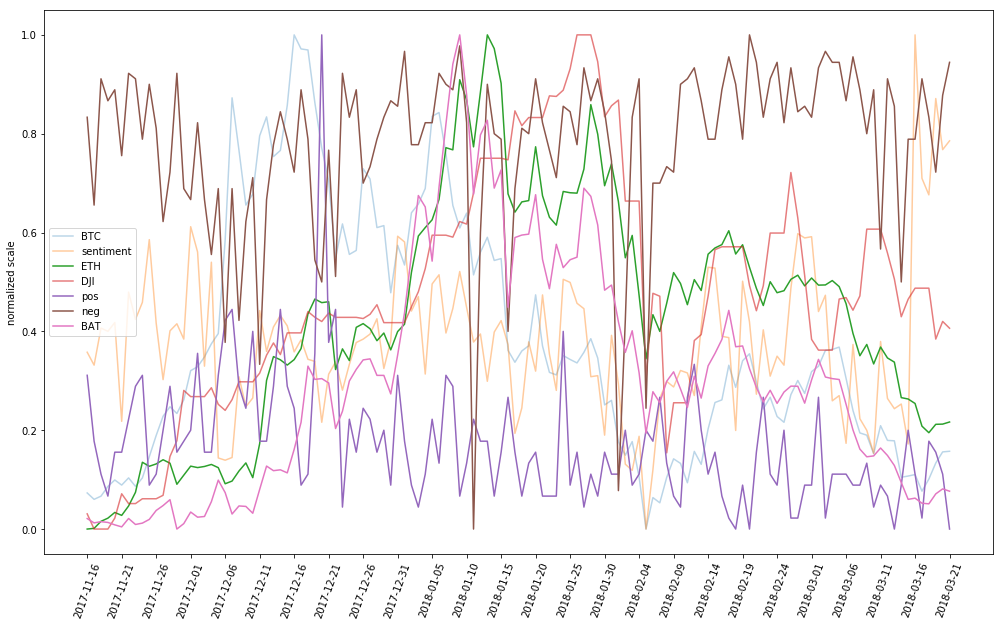

In [118]:
#lets normalize all our data to properly see:

a = features_df['price_btc'] - features_df['price_btc'].min()
b = features_df['price_eth'] - features_df['price_eth'].min()
c = features_df['sentiment'] - features_df['sentiment'].min()
d = features_df['DJI'] - features_df['DJI'].min()

e = features_df['pos_count'] - features_df['pos_count'].min()
f = features_df['neg_count'] - features_df['neg_count'].min()
g = features_df['price_bat'] - features_df['price_bat'].min()

#df_ultra_mega_frame
norm_btc = a/a.max()
norm_eth = b/b.max()
norm_sent = c/c.max()
norm_dji = d/d.max()

norm_pos = e/e.max()
norm_neg = f/f.max()
norm_bat = g/g.max()

plt.figure(figsize=(17, 10))
line_btc = plt.plot(norm_btc, label='BTC', alpha = 0.3)
line_sent = plt.plot(norm_sent, label='sentiment', alpha = 0.4)
line_eth = plt.plot(norm_eth, label='ETH', alpha = 1)
line_dji = plt.plot(norm_dji, label='DJI', alpha = 0.6)
line_pos = plt.plot(norm_pos, label='pos', alpha = 1)
line_neg = plt.plot(norm_neg, label='neg', alpha = 1)
line_bat = plt.plot(norm_bat, label='BAT', alpha = 1)

plt.legend() #bbox_to_anchor=(1, 1),
 #         bbox_transform=plt.gcf().transFigure)

plt.ylabel('normalized scale')
plt.xticks(rotation=70)
plt.xticks(np.arange(0, len(features_df), 5.0))
plt.show()

In [120]:
# new features df gets sent out to csv :
features_df.to_csv('bat_features_df.csv')